<a href="https://colab.research.google.com/github/dhesaardhi/dhesa-ardhi/blob/main/Student_Performance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT BACKDROUND**<br>
Penelitian ini untuk menguji algoritma klasifikasi dengan menghasilkan report dimana yang bertujuan untuk mengetahui algoritma mana yang baik digunakan berdasarkan dataset student drop out. Disini juga akan membandingkan hasil klasifikasi dari `baseline`, `feature selection`,`normalisasi`,dan `dimentionality reuction`

**DATASET**<br>

Dataset berupa data student performance dari sebuah sekolah dimana untuk mengklasifikasikan `final grade` <br>
Link Dataset : [DATASET STUDENT PERFORMANCE](https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation)

**IMPORT LIBRARY**

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA LOADING**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets
# Combining the features and target for data cleaning and data visulization
dataStudent = pd.concat([X, y], axis = 1)
dataStudent

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
dataStudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In this dataset, there are 36 columns with 7 columns of float data type, 29 columns of integer data type and 1 columns of object data type

In [ ]:
dataStudent.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Tidak ada data yang bernilai **NULL**

In [ ]:
# Periksa apakah ada nilai NaN dalam kolom 'Target'
print(dataStudent['Target'].isna().sum())
dataStudent['Target']

0


0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

**Eksploarsi Data**

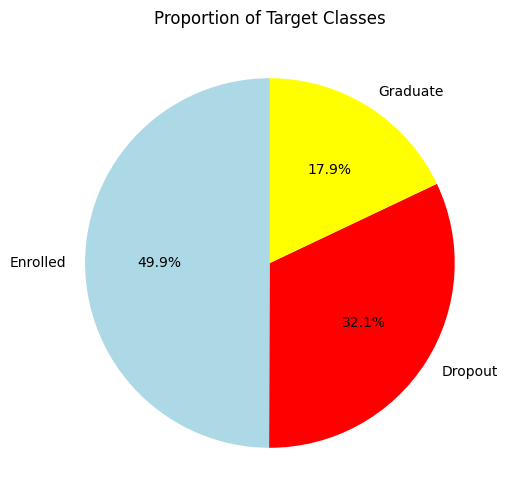

In [ ]:
dataStudentT = dataStudent["Target"].value_counts()

# Label sesuai dengan jumlah data (3 kelas target)
labels = ["Enrolled", "Dropout", "Graduate"]

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie(dataStudentT, labels=labels, autopct="%1.1f%%", startangle=90, colors=["lightblue", "red", "yellow"])
plt.title("Proportion of Target Classes")
plt.show()

Berdasarkan diagram di atas, kita dapat memahami bahwa `Enrolled` student lebih tinggi dibandingkan dengan status `Graduate` dan `Dropout`

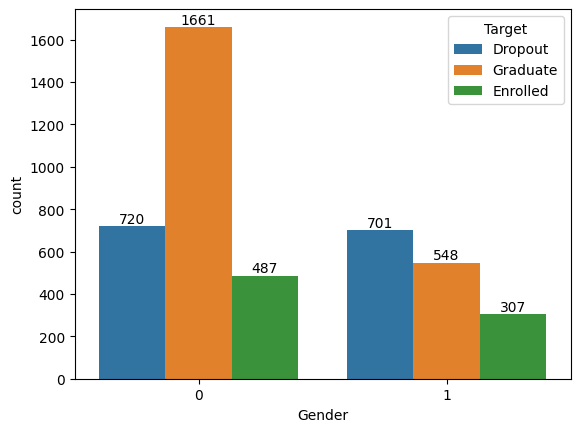

In [ ]:
# Count Plot `Target` based on `gender`

gender_isTarget = sns.countplot(data=dataStudent, x="Gender", hue="Target")

for container in gender_isTarget.containers:
    gender_isTarget.bar_label(container)

plt.show()

Dari grafik diatas didapatkan gender dengan status `0` (Male) menghasilkan jumlah terbanyak dengan status target `Graduate` sedangkan untuk gender dengan statud `1` (Female) menghasilkan jumlah terbanyak dengan status Target `Dropout`

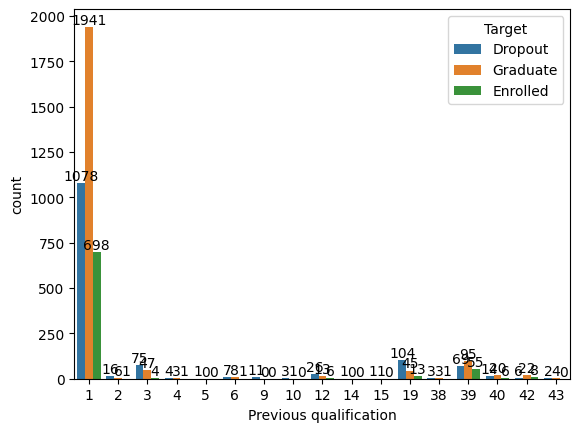

In [ ]:
# Count Plot `Target` based on `gender`

qualification_isTarget = sns.countplot(data=dataStudent, x="Previous qualification", hue="Target")

for container in qualification_isTarget.containers:
    qualification_isTarget.bar_label(container)

plt.show()

Berdasarkan grafik diatas dapat diketahui bahwa untuk pendidikan sebelumnya `Previous qualification` berasal dari Secondary education dan yang berhasil menyelesaikan atau status `Graduate` tertinggi dengan 1941 cases

Keterangan **Previous Qualification**

1 - Secondary education <br>
2 - Higher education - bachelor's degree <br>
3 - Higher education - degree <br>
4 - Higher education - master's <br>
5 - Higher education - doctorate <br>
6 - Frequency of higher education <br>
9 - 12th year of schooling - not completed <br>
10 - 11th year of schooling - not completed <br>
12 - Other - 11th year of schooling <br>
14 - 10th year of schooling <br>
15 - 10th year of schooling - not completed <br>
19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. <br>
38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. <br>39 - Technological specialization course <br>
40 - Higher education - degree (1st cycle)<br>
42 - Professional higher technical course <br>
43 - Higher education - master (2nd cycle)<br>

**Split between Numeric Columns and Category Columns**

In [ ]:
dataStudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Get Numeric Columns and Categorical Columns
num_columns     = dataStudent.drop(columns=['Target']).columns.tolist()
cat_columns_1   = dataStudent[['Target']].columns.tolist()

In [ ]:
# Split dataset based on column types
X_num = dataStudent[num_columns]
X_cat_1 = dataStudent[cat_columns_1]

Columns yang bersifat numerik adalah Columns selain data target
Columns that are categorical are `Target`

In [ ]:
# Feature Encoding using OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
OHE_1 = OneHotEncoder(sparse_output=False)

X_cat_enc_1 = OHE_1.fit_transform(X_cat_1[['Target']])

feature_names_1 = OHE_1.get_feature_names_out(input_features=['Target'])

X_cat_enc_1 = pd.DataFrame(X_cat_enc_1, columns=feature_names_1)

In [ ]:
X_final = np.concatenate([X_num, X_cat_enc_1], axis = 1)
X_final

array([[ 1., 17.,  5., ...,  1.,  0.,  0.],
       [ 1., 15.,  1., ...,  0.,  0.,  1.],
       [ 1.,  1.,  5., ...,  1.,  0.,  0.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  1.],
       [ 1., 10.,  1., ...,  0.,  0.,  1.]])

**Correlation Feature Check**

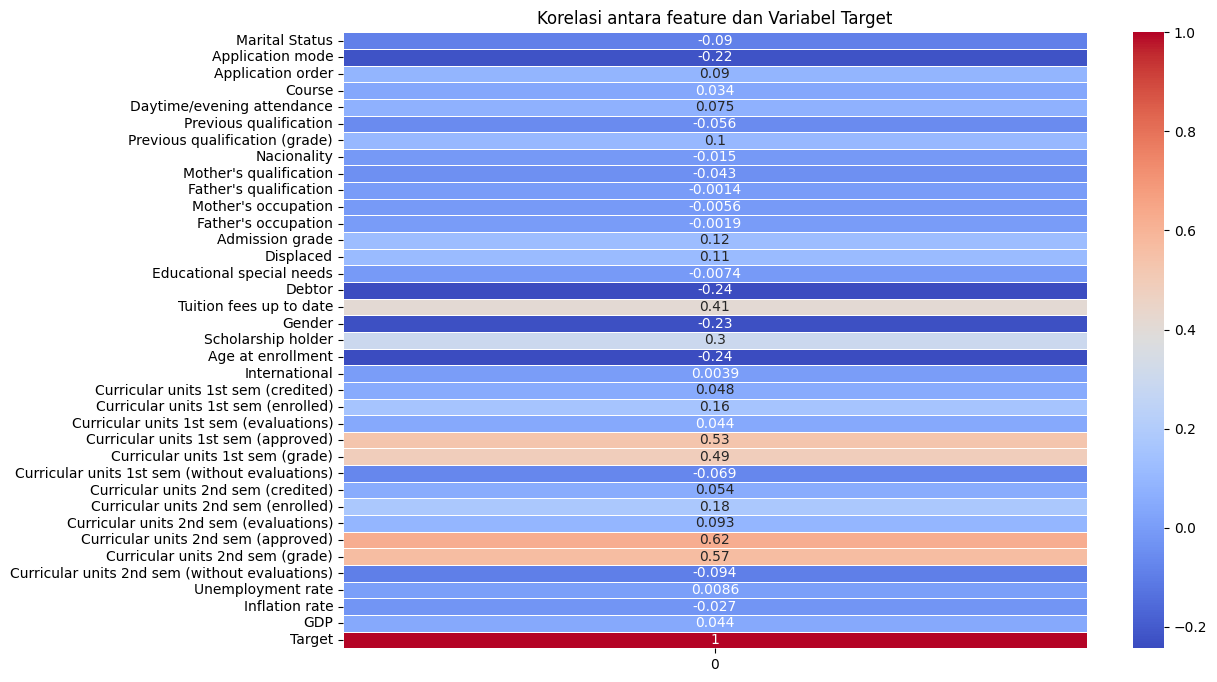

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Menggunakan label encoding atau pemetaan pada variabel target
label_encoder = LabelEncoder()
dataStudent['Target'] = label_encoder.fit_transform(dataStudent['Target'])

# Menghitung korelasi Pearson antara setiap fitur numerik dan variabel target
correlations = dataStudent.corrwith(dataStudent['Target'])

plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara feature dan Variabel Target')
plt.show()

Berdasarkan hasil uji korelasi antara semua fitur numerik dengan fitur `Target`, Dapat disimpulkan bahwa semakin besar nilai `Tuition fees up to date`, `Curricular units 2nd sem (approved)`,`Curricular units 1st sem (approved)`,`Curricular units 1st sem (grade)`, `Curricular units 2nd sem (grade)`akan mempengaruhi nilai `Target`. Ini menunjukkan adanya korelasi positif yang kuat antara fitur `Curricular units 2nd sem (approved)` dan fitur `Target`.

**SPLIT DATA**

In [ ]:
# Splitting between X and y

X = dataStudent.drop(['Target'], axis=1)
y = dataStudent['Target']

X.head(3)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74


In [ ]:
# Show shape on X and y

print(X.shape)
print(y.shape)

(4424, 36)
(4424,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3539, 36), (885, 36), (3539,), (885,))

**Model Definition**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB

lr  = LogisticRegression(random_state=50)
dtc = DecisionTreeClassifier(random_state=50)
rfc = RandomForestClassifier(random_state=50)
gbc = GaussianNB()

**Model Training**

In [ ]:
# Train the LogisticRegression model
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [ ]:
# Train the DecisionTreeClassifier model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [ ]:
# Train the RandomForestClassifier model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [ ]:
# Train the GradientBoostingClassifier model
gbc.fit(X_train, y_train)

GaussianNB()

**Evaluation**

In [ ]:
# Predict Train-set and Test-set on Logistic Regression Model

y_pred_train_log = lr.predict(X_train)
y_pred_test_log  = lr.predict(X_test)

In [ ]:
# Classification Report of Logistic Regression Model

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_log))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_log))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1137
           1       0.49      0.06      0.11       643
           2       0.66      0.93      0.77      1759

    accuracy                           0.68      3539
   macro avg       0.63      0.55      0.52      3539
weighted avg       0.65      0.68      0.63      3539


Test
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       284
           1       0.38      0.06      0.10       151
           2       0.69      0.93      0.79       450

    accuracy                           0.70       885
   macro avg       0.61      0.56      0.54       885
weighted avg       0.66      0.70      0.65       885



In [ ]:
# Predict Train-set and Test-set on DecisionTreeClassifier Model

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc  = dtc.predict(X_test)

In [ ]:
# Classification Report of DecisionTreeClassifier Model

print('Classification Report of DecisionTreeClassifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_dtc))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_dtc))

Classification Report of DecisionTreeClassifier Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00       643
           2       1.00      1.00      1.00      1759

    accuracy                           1.00      3539
   macro avg       1.00      1.00      1.00      3539
weighted avg       1.00      1.00      1.00      3539


Test
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       284
           1       0.37      0.44      0.40       151
           2       0.83      0.77      0.80       450

    accuracy                           0.69       885
   macro avg       0.63      0.64      0.63       885
weighted avg       0.71      0.69      0.70       885



In [ ]:
# Predict Train-set and Test-set on RandomForestClassifier Model

y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc  = rfc.predict(X_test)

In [ ]:
# Classification Report of RandomForestClassifier Model

print('Classification Report of RandomForestClassifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_rfc))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_rfc))

Classification Report of RandomForestClassifier Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00       643
           2       1.00      1.00      1.00      1759

    accuracy                           1.00      3539
   macro avg       1.00      1.00      1.00      3539
weighted avg       1.00      1.00      1.00      3539


Test
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       284
           1       0.62      0.40      0.48       151
           2       0.82      0.95      0.88       450

    accuracy                           0.80       885
   macro avg       0.76      0.71      0.72       885
weighted avg       0.79      0.80      0.79       885



In [ ]:
# Predict Train-set and Test-set on Naive Bayes00 Model

y_pred_train_gbc = gbc.predict(X_train)
y_pred_test_gbc  = gbc.predict(X_test)

In [ ]:
# Classification Report of Naive Bayes Model

print('Classification Report of Naive Bayes Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_gbc))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_gbc))

Classification Report of Naive Bayes Model

Train
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1137
           1       0.35      0.21      0.26       643
           2       0.70      0.84      0.76      1759

    accuracy                           0.68      3539
   macro avg       0.60      0.58      0.58      3539
weighted avg       0.65      0.68      0.66      3539


Test
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       284
           1       0.28      0.15      0.20       151
           2       0.71      0.84      0.77       450

    accuracy                           0.67       885
   macro avg       0.57      0.56      0.56       885
weighted avg       0.64      0.67      0.65       885



**Dengan Normalisasi**

**Check Outlier**

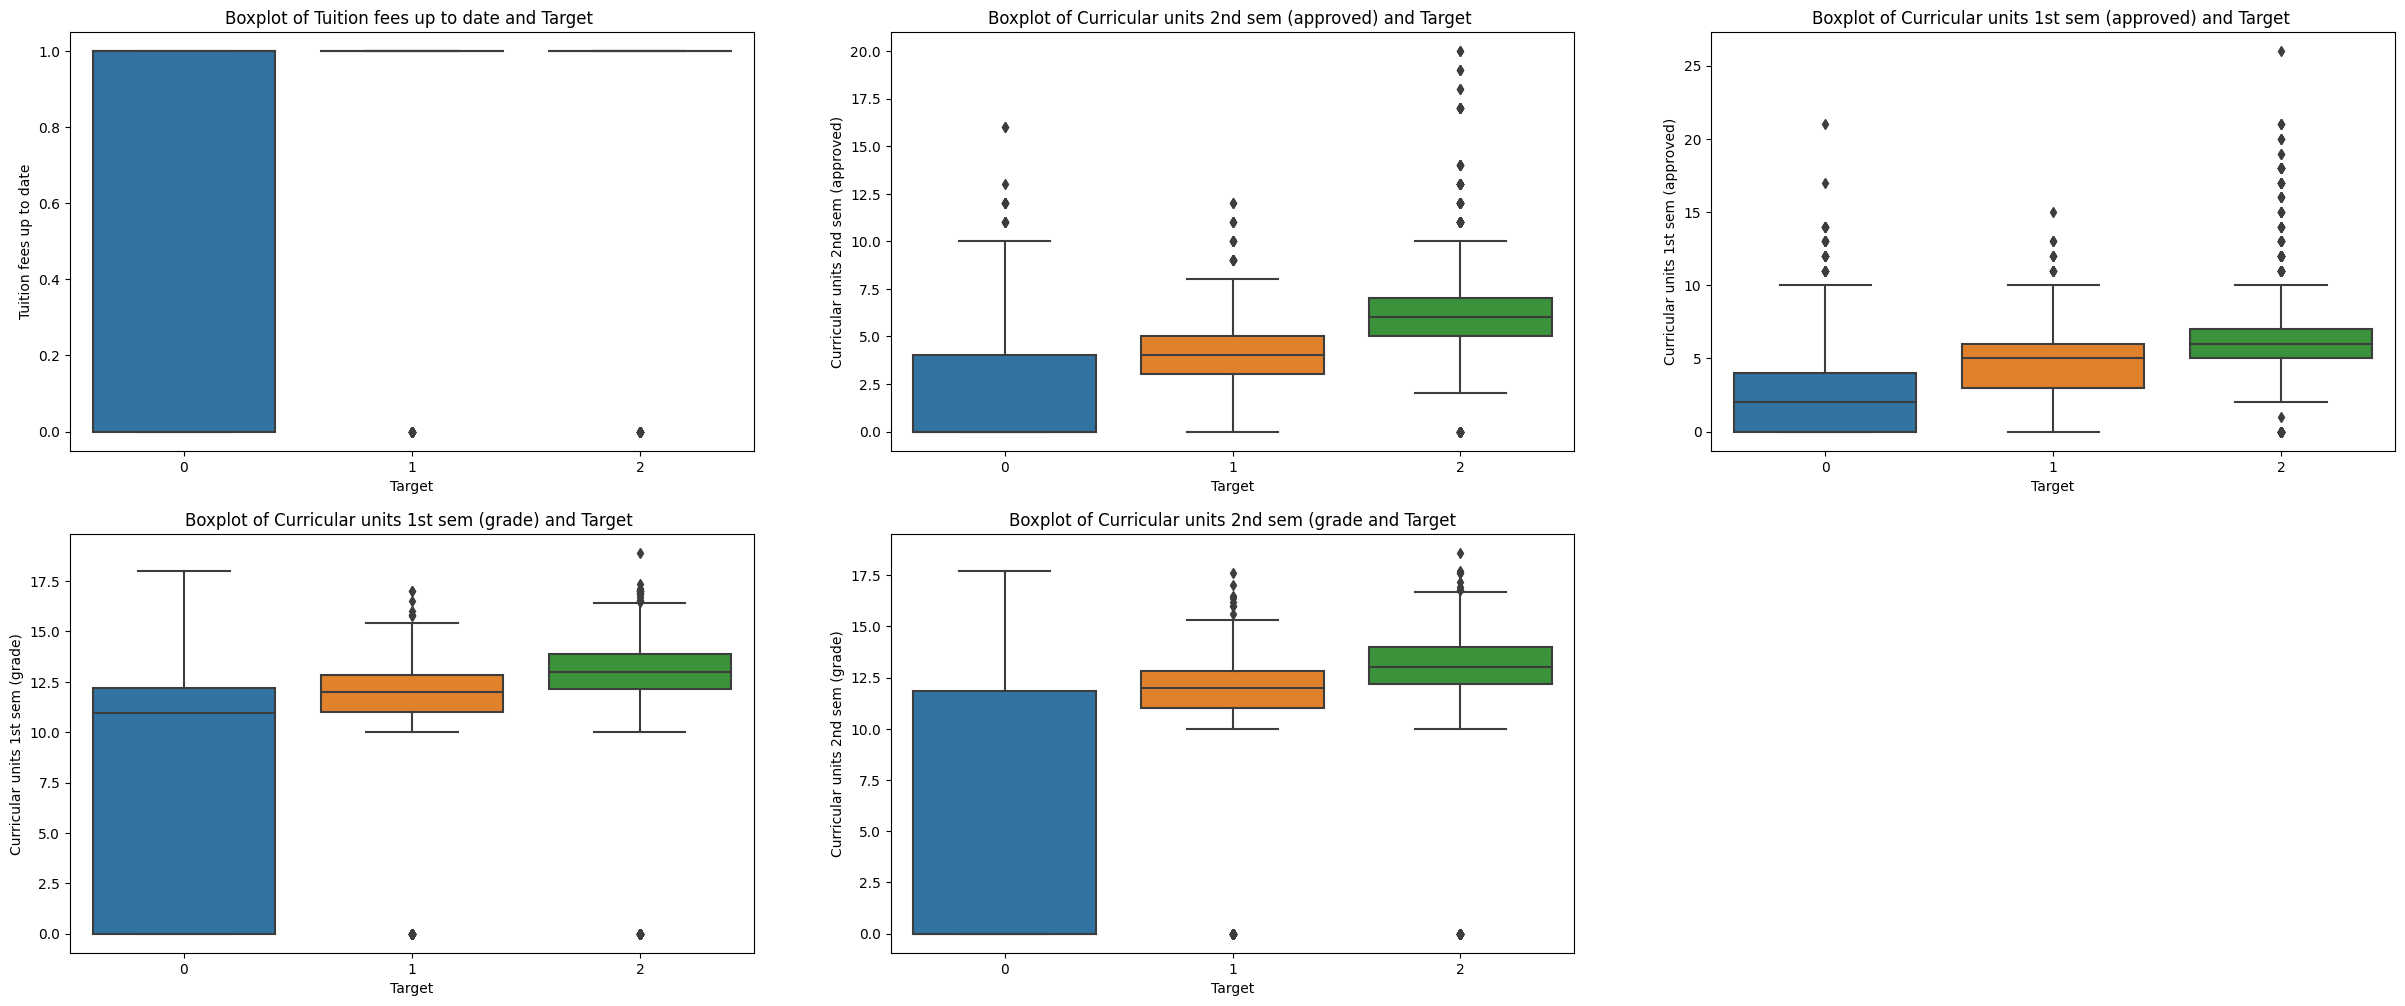

In [ ]:
plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
sns.boxplot(y="Tuition fees up to date", x="Target",data=dataStudent)
plt.title('Boxplot of Tuition fees up to date and Target ')

plt.subplot(4,3,2)
sns.boxplot(y="Curricular units 2nd sem (approved)", x="Target",data=dataStudent)
plt.title('Boxplot of Curricular units 2nd sem (approved) and Target ')

plt.subplot(4,3,3)
sns.boxplot(y="Curricular units 1st sem (approved)", x="Target",data=dataStudent)
plt.title('Boxplot of Curricular units 1st sem (approved) and Target ')

plt.subplot(4,3,4)
sns.boxplot(y="Curricular units 1st sem (grade)", x="Target",data=dataStudent)
plt.title('Boxplot of Curricular units 1st sem (grade) and Target ')

plt.subplot(4,3,5)
sns.boxplot(y="Curricular units 2nd sem (grade)", x="Target",data=dataStudent)
plt.title('Boxplot of Curricular units 2nd sem (grade and Target')

plt.show;

Berdasarkan boxplot dapat diketahui bahwa hampir semua fitur yang memiliki korelasi tertinggi terdapat outliers.

In [ ]:
dataStudent_norm = dataStudent
dataStudent_norm.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler, StandardScaler

X_features = dataStudent_norm.drop(['Target'], axis=1)
y_target = dataStudent_norm['Target']

In [ ]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_features)
X_num_scaled = scaler.transform(X_features)
X_num_scaled

array([[0.        , 0.28571429, 0.55555556, ..., 0.37209302, 0.48888889,
        0.7661823 ],
       [0.        , 0.25      , 0.11111111, ..., 0.73255814, 0.11111111,
        0.64068692],
       [0.        , 0.        , 0.55555556, ..., 0.37209302, 0.48888889,
        0.7661823 ],
       ...,
       [0.        , 0.        , 0.11111111, ..., 0.73255814, 0.11111111,
        0.64068692],
       [0.        , 0.        , 0.11111111, ..., 0.20930233, 0.        ,
        0.12417437],
       [0.        , 0.16071429, 0.11111111, ..., 0.59302326, 1.        ,
        0.31175694]])

In [ ]:
X_final_df = pd.DataFrame(X_num_scaled)
X_final_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.000000,0.837209,0.837209,...,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.860465,...,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,0.666667,0.978108,1.0,0.0,0.315789,0.000000,0.000000,0.000000,...,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000
4420,0.0,0.000000,0.222222,0.978108,1.0,0.0,0.263158,0.962963,0.000000,0.000000,...,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170
4421,0.0,0.000000,0.111111,0.950693,1.0,0.0,0.621053,0.000000,0.837209,0.837209,...,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687
4422,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.894737,0.000000,0.837209,0.837209,...,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174


In [ ]:
from sklearn.model_selection import train_test_split
X_train_norm,X_test_norm,y_train_norm,y_test_norm = train_test_split(X_final_df,y_target,test_size=0.2,random_state=0)
X_train_norm.shape,X_test_norm.shape,y_train_norm.shape,y_test_norm.shape

((3539, 36), (885, 36), (3539,), (885,))

**Model Training**

In [ ]:
# Train the LogisticRegression + Norm model
lr.fit(X_train_norm, y_train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [ ]:
# Train the Decision + Norm model
dtc.fit(X_train_norm, y_train_norm)

DecisionTreeClassifier(random_state=50)

In [ ]:
# Train the Random Forest + Norm model
rfc.fit(X_train_norm, y_train_norm)

RandomForestClassifier(random_state=50)

In [ ]:
# Train the Naive Bayes + Norm model
gbc.fit(X_train_norm, y_train_norm)

GaussianNB()

**Evaluation Model Setelah Normalisasi**

In [ ]:
y_pred_train_log_norm = lr.predict(X_train_norm)
y_pred_test_log_norm  = lr.predict(X_test_norm)

In [ ]:
# Classification Report of Logistic Regression Model

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train_norm,y_pred_train_log_norm))
print('')
print('Test')
print(classification_report(y_test_norm,y_pred_test_log_norm))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1137
           1       0.57      0.30      0.39       643
           2       0.77      0.94      0.85      1759

    accuracy                           0.77      3539
   macro avg       0.72      0.67      0.68      3539
weighted avg       0.75      0.77      0.75      3539


Test
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.53      0.34      0.41       151
           2       0.81      0.95      0.87       450

    accuracy                           0.78       885
   macro avg       0.72      0.67      0.69       885
weighted avg       0.76      0.78      0.76       885



In [ ]:
y_pred_train_dtc_norm = dtc.predict(X_train_norm)
y_pred_test_dtc_norm  = dtc.predict(X_test_norm)

In [ ]:
# Classification Report of Decision Tree Model

print('Classification Report of Decision Tree Model\n')
print('Train')
print(classification_report(y_train_norm,y_pred_train_dtc_norm))
print('')
print('Test')
print(classification_report(y_test_norm,y_pred_test_dtc_norm))

Classification Report of Decision Tree Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00       643
           2       1.00      1.00      1.00      1759

    accuracy                           1.00      3539
   macro avg       1.00      1.00      1.00      3539
weighted avg       1.00      1.00      1.00      3539


Test
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       284
           1       0.38      0.44      0.40       151
           2       0.83      0.77      0.79       450

    accuracy                           0.69       885
   macro avg       0.63      0.64      0.63       885
weighted avg       0.71      0.69      0.70       885



In [ ]:
y_pred_train_rfc_norm = rfc.predict(X_train_norm)
y_pred_test_rfc_norm  = rfc.predict(X_test_norm)

In [ ]:
# Classification Report of Random Forest Model

print('Classification Report of Random Forest Model\n')
print('Train')
print(classification_report(y_train_norm,y_pred_train_rfc_norm))
print('')
print('Test')
print(classification_report(y_test_norm,y_pred_test_rfc_norm))

Classification Report of Random Forest Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00       643
           2       1.00      1.00      1.00      1759

    accuracy                           1.00      3539
   macro avg       1.00      1.00      1.00      3539
weighted avg       1.00      1.00      1.00      3539


Test
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       284
           1       0.60      0.38      0.47       151
           2       0.82      0.95      0.88       450

    accuracy                           0.80       885
   macro avg       0.75      0.70      0.72       885
weighted avg       0.78      0.80      0.78       885



In [ ]:
y_pred_train_gbc_norm = gbc.predict(X_train_norm)
y_pred_test_gbc_norm  = gbc.predict(X_test_norm)

In [ ]:
# Classification Report of Naive Bayes Model

print('Classification Report of Naive Bayes Model\n')
print('Train')
print(classification_report(y_train_norm,y_pred_train_gbc_norm))
print('')
print('Test')
print(classification_report(y_test_norm,y_pred_test_gbc_norm))

Classification Report of Naive Bayes Model

Train
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1137
           1       0.34      0.20      0.25       643
           2       0.70      0.84      0.76      1759

    accuracy                           0.68      3539
   macro avg       0.60      0.58      0.58      3539
weighted avg       0.65      0.68      0.66      3539


Test
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       284
           1       0.23      0.13      0.16       151
           2       0.70      0.83      0.76       450

    accuracy                           0.67       885
   macro avg       0.55      0.55      0.54       885
weighted avg       0.63      0.67      0.64       885



**Feature Selection**

Berdasarkan hasil korelasi, untuk modeling diambil dari feature yang mempunyai nilai tinggi terhadapt Target, adapun feature sebagai berikut :
1. Tuition fees up to date <br>
2. Curricular units 2nd sem (approved) <br>
3. Curricular units 1st sem (approved) <br>
4. Curricular units 1st sem (grade) <br>
5. Curricular units 2nd sem (grade)

In [ ]:
dataStudent_norm_fs = X_final_df.loc[:,[15,24,25,29,30]]
dataStudent_norm_fs

,15,24,25,29,30
0,0.0,0.000000,0.000000,0.000000,0.00
1,0.0,0.230769,0.741722,0.181818,0.30
2,0.0,0.000000,0.000000,0.000000,0.00
3,0.0,0.230769,0.711447,0.303030,0.25
4,0.0,0.192308,0.653422,0.181818,0.30
...,...,...,...,...,...
4419,0.0,0.192308,0.720530,0.242424,0.25
4420,1.0,0.230769,0.635762,0.181818,0.10
4421,0.0,0.269231,0.790066,0.272727,0.05
4422,0.0,0.192308,0.731126,0.181818,0.25


In [ ]:
from sklearn.model_selection import train_test_split
X_train_norm_fs,X_test_norm_fs,y_train_norm_fs,y_test_norm_fs = train_test_split(dataStudent_norm_fs,y_target,test_size=0.2,random_state=0)
X_train_norm_fs.shape,X_test_norm_fs.shape,y_train_norm_fs.shape,y_test_norm_fs.shape

((3539, 5), (885, 5), (3539,), (885,))

In [ ]:
# Train the LogisticRegression + Norm + fs model
lr.fit(X_train_norm_fs, y_train_norm_fs)

y_pred_train_log_norm_fs = lr.predict(X_train_norm_fs)
y_pred_test_log_norm_fs  = lr.predict(X_test_norm_fs)

In [ ]:
# Classification Report of Logistic Regression

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train_norm_fs,y_pred_train_log_norm_fs))
print('')
print('Test')
print(classification_report(y_test_norm_fs,y_pred_test_log_norm_fs))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1137
           1       0.33      0.05      0.08       643
           2       0.74      0.92      0.82      1759

    accuracy                           0.71      3539
   macro avg       0.59      0.58      0.54      3539
weighted avg       0.65      0.71      0.66      3539


Test
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       284
           1       0.33      0.06      0.10       151
           2       0.77      0.93      0.84       450

    accuracy                           0.74       885
   macro avg       0.61      0.59      0.56       885
weighted avg       0.68      0.74      0.69       885



In [ ]:
# Train the Decision Tree + Norm + fs model
dtc.fit(X_train_norm_fs, y_train_norm_fs)

y_pred_train_dtc_norm_fs = dtc.predict(X_train_norm_fs)
y_pred_test_dtc_norm_fs  = dtc.predict(X_test_norm_fs)

In [ ]:
# Classification Report of Decision Tree Model

print('Classification Report of Decision Tree Model\n')
print('Train')
print(classification_report(y_train_norm_fs,y_pred_train_dtc_norm_fs))
print('')
print('Test')
print(classification_report(y_test_norm_fs,y_pred_test_dtc_norm_fs))

Classification Report of Decision Tree Model

Train
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1137
           1       0.91      0.87      0.89       643
           2       0.98      0.92      0.95      1759

    accuracy                           0.93      3539
   macro avg       0.92      0.92      0.92      3539
weighted avg       0.94      0.93      0.93      3539


Test
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       284
           1       0.37      0.41      0.39       151
           2       0.81      0.73      0.77       450

    accuracy                           0.68       885
   macro avg       0.62      0.63      0.62       885
weighted avg       0.69      0.68      0.68       885



In [ ]:
# Train the Random Forest + Norm + fs model
rfc.fit(X_train_norm_fs, y_train_norm_fs)

y_pred_train_rfc_norm_fs = rfc.predict(X_train_norm_fs)
y_pred_test_rfc_norm_fs  = rfc.predict(X_test_norm_fs)

In [ ]:
# Classification Report of Random Forest Model

print('Classification Report of Random Forest Model\n')
print('Train')
print(classification_report(y_train_norm_fs,y_pred_train_rfc_norm_fs))
print('')
print('Test')
print(classification_report(y_test_norm_fs,y_pred_test_rfc_norm_fs))

Classification Report of Random Forest Model

Train
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1137
           1       0.96      0.82      0.88       643
           2       0.95      0.95      0.95      1759

    accuracy                           0.93      3539
   macro avg       0.93      0.91      0.92      3539
weighted avg       0.93      0.93      0.93      3539


Test
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       284
           1       0.41      0.38      0.39       151
           2       0.80      0.80      0.80       450

    accuracy                           0.71       885
   macro avg       0.64      0.64      0.64       885
weighted avg       0.70      0.71      0.71       885



In [ ]:
# Train the Naive Bayes + Norm + fs model
gbc.fit(X_train_norm_fs, y_train_norm_fs)

y_pred_train_gbc_norm_fs = gbc.predict(X_train_norm_fs)
y_pred_test_gbc_norm_fs  = gbc.predict(X_test_norm_fs)

# Classification Report of Naive Bayes Model

print('Classification Report of Naive Bayes Model\n')
print('Train')
print(classification_report(y_train_norm_fs,y_pred_train_gbc_norm_fs))
print('')
print('Test')
print(classification_report(y_test_norm_fs,y_pred_test_gbc_norm_fs))

Classification Report of Naive Bayes Model

Train
              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1137
           1       0.36      0.16      0.23       643
           2       0.69      0.92      0.79      1759

    accuracy                           0.69      3539
   macro avg       0.61      0.57      0.57      3539
weighted avg       0.66      0.69      0.66      3539


Test
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       284
           1       0.35      0.18      0.24       151
           2       0.72      0.91      0.81       450

    accuracy                           0.71       885
   macro avg       0.62      0.59      0.59       885
weighted avg       0.68      0.71      0.68       885



**Reduksi Dimensi dengan PCA**

In [ ]:
dataStudent_norm_fs_rd = dataStudent_norm_fs

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(dataStudent_norm_fs_rd)
princ_comp = pca.transform(dataStudent_norm_fs_rd)
princ_comp

array([[ 0.27351946, -0.62209216,  0.03298256],
       [-0.19707225,  0.08318112, -0.05306066],
       [ 0.27351946, -0.62209216,  0.03298256],
       ...,
       [-0.17259446,  0.06553653, -0.1886649 ],
       [-0.17252631,  0.04928275, -0.09467997],
       [-0.1414864 , -0.00100603,  0.01829393]])

In [ ]:
X_train_norm_fs_rd,X_test_norm_fs_rd,y_train_norm_fs_rd,y_test_norm_fs_rd = train_test_split(princ_comp,y_target,test_size=0.2,random_state=0)
X_train_norm_fs_rd.shape,X_test_norm_fs_rd.shape,y_train_norm_fs_rd.shape,y_test_norm_fs_rd.shape

((3539, 3), (885, 3), (3539,), (885,))

In [ ]:
# Train the LogisticRegression + Norm + fs + red model
lr.fit(X_train_norm_fs_rd, y_train_norm_fs_rd)

y_pred_train_log_norm_fs_rd = lr.predict(X_train_norm_fs_rd)
y_pred_test_log_norm_fs_rd  = lr.predict(X_test_norm_fs_rd)

In [ ]:
# Classification Report of Logistic Regression

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train_norm_fs_rd,y_pred_train_log_norm_fs_rd))
print('')
print('Test')
print(classification_report(y_test_norm_fs_rd,y_pred_test_log_norm_fs_rd))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1137
           1       0.00      0.00      0.00       643
           2       0.66      0.93      0.77      1759

    accuracy                           0.68      3539
   macro avg       0.47      0.54      0.49      3539
weighted avg       0.56      0.68      0.61      3539


Test
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       284
           1       0.00      0.00      0.00       151
           2       0.68      0.93      0.79       450

    accuracy                           0.71       885
   macro avg       0.48      0.55      0.51       885
weighted avg       0.59      0.71      0.64       885



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Train the Decision Tree + Norm + fs + red model
dtc.fit(X_train_norm_fs_rd, y_train_norm_fs_rd)

y_pred_train_dtc_norm_fs_rd = dtc.predict(X_train_norm_fs_rd)
y_pred_test_dtc_norm_fs_rd  = dtc.predict(X_test_norm_fs_rd)

# Classification Report of Decision Tree

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train_norm_fs_rd,y_pred_train_dtc_norm_fs_rd))
print('')
print('Test')
print(classification_report(y_test_norm_fs_rd,y_pred_test_dtc_norm_fs_rd))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1137
           1       0.91      0.87      0.89       643
           2       0.98      0.92      0.95      1759

    accuracy                           0.93      3539
   macro avg       0.92      0.92      0.92      3539
weighted avg       0.94      0.93      0.93      3539


Test
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       284
           1       0.31      0.30      0.31       151
           2       0.78      0.71      0.74       450

    accuracy                           0.65       885
   macro avg       0.58      0.59      0.58       885
weighted avg       0.66      0.65      0.65       885



In [ ]:
# Train the Random Forest + Norm + fs + red model
rfc.fit(X_train_norm_fs_rd, y_train_norm_fs_rd)

y_pred_train_rfc_norm_fs_rd = rfc.predict(X_train_norm_fs_rd)
y_pred_test_rfc_norm_fs_rd  = rfc.predict(X_test_norm_fs_rd)

# Classification Report of Random Forest

print('Classification Report of Random Forest Model\n')
print('Train')
print(classification_report(y_train_norm_fs_rd,y_pred_train_rfc_norm_fs_rd))
print('')
print('Test')
print(classification_report(y_test_norm_fs_rd,y_pred_test_rfc_norm_fs_rd))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1137
           1       0.96      0.82      0.88       643
           2       0.95      0.95      0.95      1759

    accuracy                           0.93      3539
   macro avg       0.93      0.91      0.92      3539
weighted avg       0.93      0.93      0.93      3539


Test
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       284
           1       0.38      0.28      0.32       151
           2       0.77      0.82      0.79       450

    accuracy                           0.70       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.68      0.70      0.69       885



In [ ]:
# Train the Naive Bayes + Norm + fs + red model
gbc.fit(X_train_norm_fs_rd, y_train_norm_fs_rd)

y_pred_train_gbc_norm_fs_rd = gbc.predict(X_train_norm_fs_rd)
y_pred_test_gbc_norm_fs_rd  = gbc.predict(X_test_norm_fs_rd)

# Classification Report of Naive Bayes

print('Classification Report of Naive Bayes Model\n')
print('Train')
print(classification_report(y_train_norm_fs_rd,y_pred_train_gbc_norm_fs_rd))
print('')
print('Test')
print(classification_report(y_test_norm_fs_rd,y_pred_test_gbc_norm_fs_rd))

Classification Report of Naive Bayes Model

Train
              precision    recall  f1-score   support

           0       0.71      0.55      0.62      1137
           1       0.00      0.00      0.00       643
           2       0.61      0.92      0.74      1759

    accuracy                           0.63      3539
   macro avg       0.44      0.49      0.45      3539
weighted avg       0.53      0.63      0.56      3539


Test
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       284
           1       0.00      0.00      0.00       151
           2       0.63      0.91      0.74       450

    accuracy                           0.65       885
   macro avg       0.45      0.50      0.46       885
weighted avg       0.55      0.65      0.58       885



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif